# Projeto: Qualidade do Ar

O que será que afeta a qualidade do ar?

## 1 - Criando e Testando Modelos Simples

In [1]:
# Importando a base de dados a qual vamos trabalhar
air <- read.csv('/home/joeldspy/Modelos/datasets/airq.csv')

In [2]:
# Visualizando as 5 primeiras observações
head(air)

,airq,vala,rain,coas,dens,medi
,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>
1,104,2734.4,12.63,yes,1815.86,4397
2,85,2479.2,47.14,yes,804.86,5667
3,127,4845.0,42.77,yes,1907.86,15817
4,145,19733.8,33.18,no,1876.08,32698
5,84,4093.6,34.55,yes,340.93,6250
6,135,1849.8,14.81,no,335.52,4705


> - airq: Índice de qualidade do ar, quanto menor, melhor.
> - vala: Valor de empresas nas cidades (em milhares de dólares)
> - rain: Quantidade de chuva na cidade (em polegadas)
> - coas: Se a cidade está próxim ou não do mar
> - dens: Densidade populacional (em milhas quadradas)
> - medi: Renda per capita (em dólares)

In [3]:
# Visualizando um resumo da nossa base de dados
summary(air)

      airq            vala              rain           coas          
 Min.   : 59.0   Min.   :  992.9   Min.   :12.63   Length:30         
 1st Qu.: 81.0   1st Qu.: 1535.8   1st Qu.:31.02   Class :character  
 Median :114.0   Median : 2629.8   Median :36.66   Mode  :character  
 Mean   :104.7   Mean   : 4188.5   Mean   :36.08                     
 3rd Qu.:126.2   3rd Qu.: 4141.4   3rd Qu.:42.70                     
 Max.   :165.0   Max.   :19733.8   Max.   :68.13                     
      dens              medi      
 Min.   :  271.6   Min.   :  853  
 1st Qu.:  365.2   1st Qu.: 3340  
 Median :  796.2   Median : 4858  
 Mean   : 1728.6   Mean   : 9477  
 3rd Qu.: 1635.2   3rd Qu.: 8715  
 Max.   :12957.5   Max.   :59460  

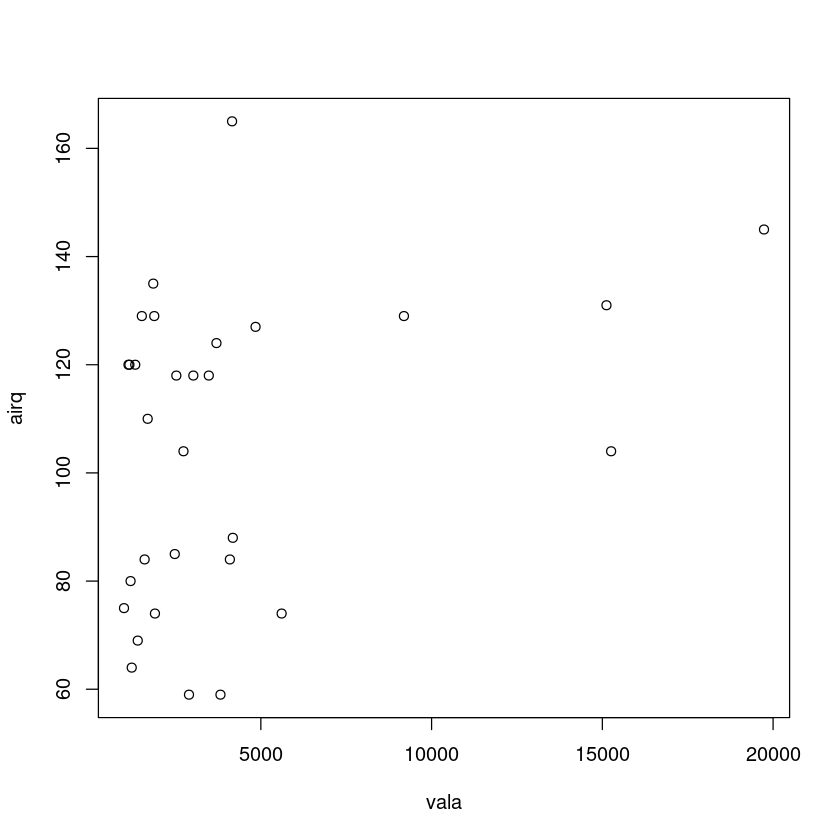

In [4]:
# Visualizando a relação entre $airq e $vala
plot(airq ~ vala, data = air)

In [48]:
# Criando um modelo estatístico simples
linear_model <- lm(airq ~ vala, data = air)

linear_model


Call:
lm(formula = airq ~ vala, data = air)

Coefficients:
(Intercept)         vala  
  96.451419     0.001969  


In [49]:
# Visualizando as informações do nosso modelo
summary(linear_model)


Call:
lm(formula = airq ~ vala, data = air)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.970 -22.002   7.228  20.774  60.361 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 96.451419   6.691801  14.413 1.76e-14 ***
vala         0.001969   0.001082   1.821   0.0794 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.97 on 28 degrees of freedom
Multiple R-squared:  0.1058,	Adjusted R-squared:  0.07391 
F-statistic: 3.314 on 1 and 28 DF,  p-value: 0.07938


Normalmente, o P-VALUE expressa se o modelo foi significativo

In [50]:
# Avaliando o modelo linear
pvalue <- 0.07938

if (pvalue < 0.05) {
    cat('MODELO SIGNIFICATIVO')
} else {
    cat('MODELO INSIGNICATIVO')
}

MODELO INSIGNICATIVO

In [53]:
evaluate_model <- function(model) {
    smr <- summary(model)
    return (smr$coefficients[2, 4] < 0.05)  
}

In [58]:
evaluate_model(linear_model)

[1] FALSE

In [57]:
if (evaluate_model(linear_model)) print('Modelo significativo')

<font color='green'> Conclusão: A Variável "vala" não fala muito a respeito da qualidade do ar </font>

In [60]:
# Modelo linear com a variável coas
linear_model <- lm(airq ~ coas, data = air)

summary(linear_model)


Call:
lm(formula = airq ~ coas, data = air)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.857 -15.726  -6.333  17.167  69.143 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  125.333      8.288  15.123 5.32e-15 ***
coasyes      -29.476      9.906  -2.976  0.00596 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.86 on 28 degrees of freedom
Multiple R-squared:  0.2403,	Adjusted R-squared:  0.2131 
F-statistic: 8.855 on 1 and 28 DF,  p-value: 0.005965


In [61]:
# Testando o p-value para a variável coas
evaluate_model(linear_model)

[1] TRUE

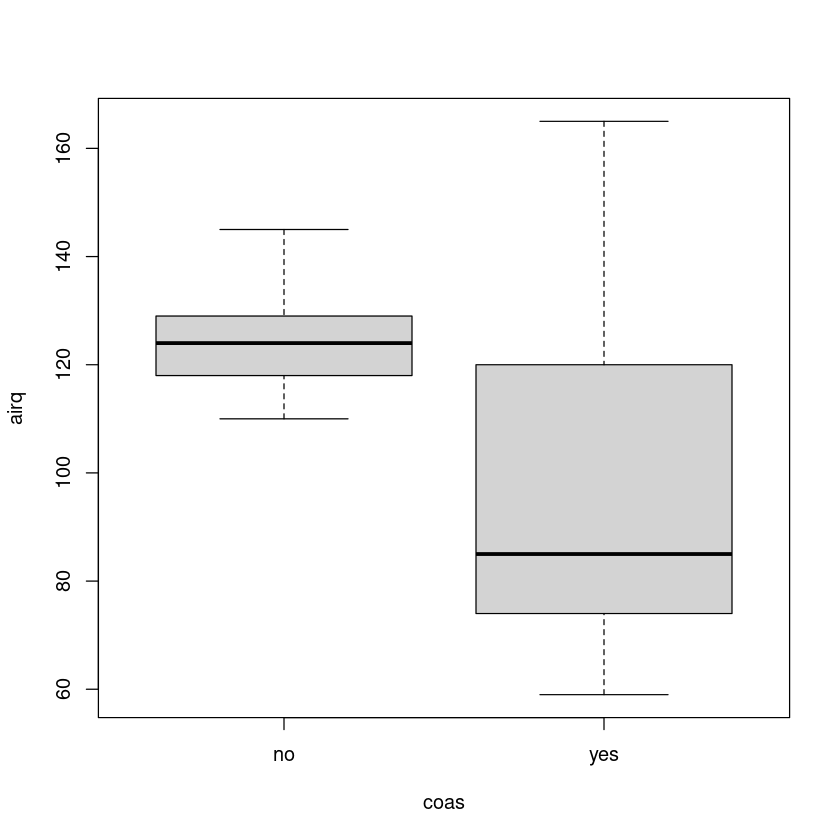

In [62]:
# Visualizando a qualidade do ar em referência ao coas
boxplot(airq ~ coas, data = air)

In [87]:
# Avaliando todas as variáveis do nosso banco de dados
models <- list("vala" = lm(airq ~ vala, data = air),
               "rain" = lm(airq ~ rain, data = air),
               "coas" = lm(airq ~ coas, data = air),
               "dens" = lm(airq ~ dens, data = air),
               "medi" = lm(airq ~ medi, data = air))

resultados <- lapply(models, evaluate_model)
resultados

$vala
[1] FALSE

$rain
[1] FALSE

$coas
[1] TRUE

$dens
[1] FALSE

$medi
[1] FALSE

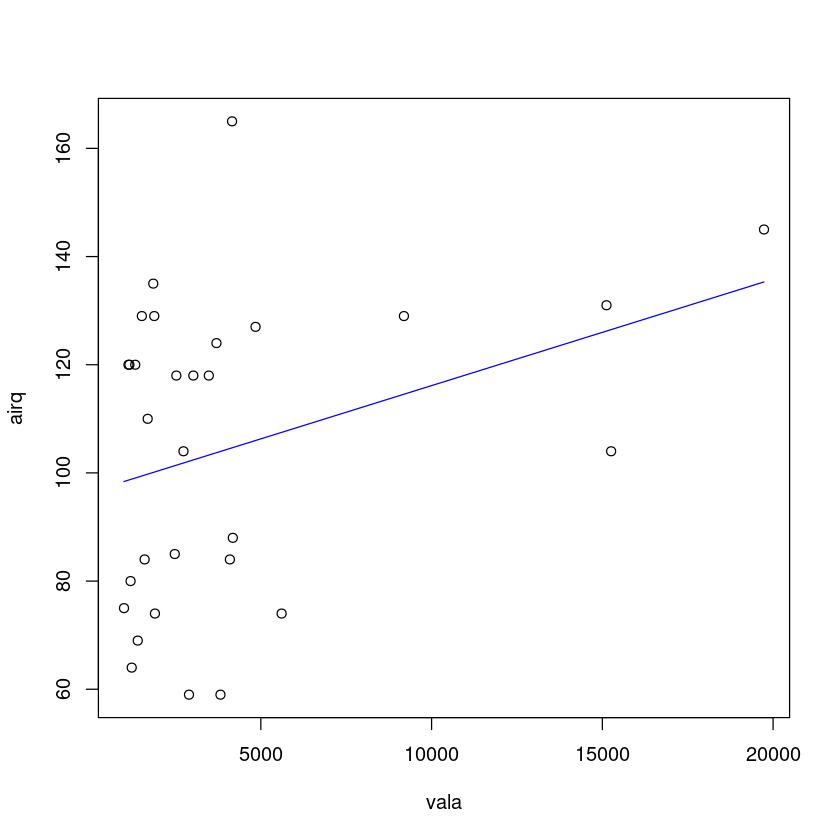

In [114]:
alpha <- 0.001969; beta <- 96.451419

plot(airq ~ vala, data = air)

curve(beta + alpha * x, add=TRUE, col='blue')

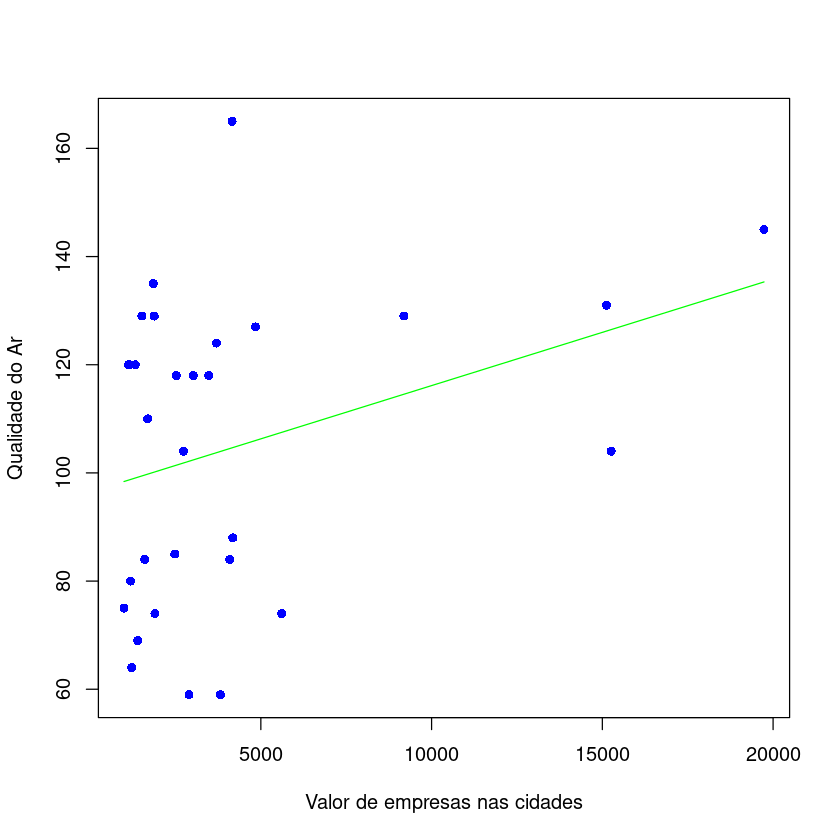

In [126]:
plot(airq ~ vala, data = air, xlab = 'Valor de empresas nas cidades', ylab='Qualidade do Ar', pch=16, col='blue')

curve(beta + alpha * x, add=TRUE, col='green')

## 2 - Modelos Múltiplos

In [132]:
m1 <- models$vala
m2 <- models$coas
m3 <- models$dens
m4 <- models$medi
m5 <- models$rain

In [134]:
# Criando um modelo de regressão múltipla
r1 <- lm(airq ~ vala + coas, data = air)
r1


Call:
lm(formula = airq ~ vala + coas, data = air)

Coefficients:
(Intercept)         vala      coasyes  
    117.099        0.002      -29.677  


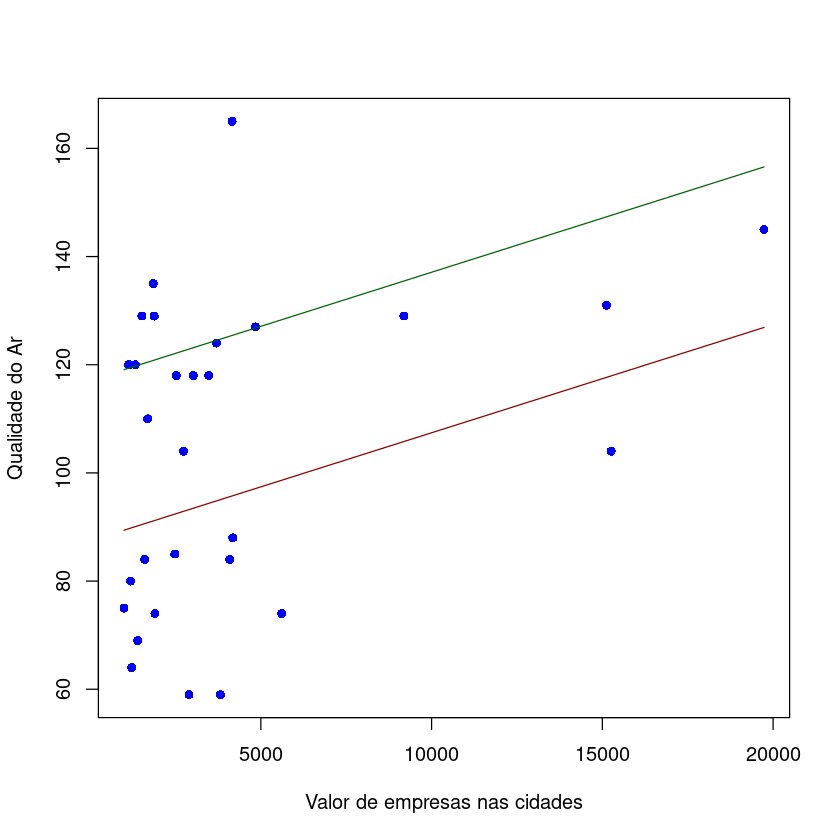

In [154]:
plot(airq ~ vala, data = air, xlab = 'Valor de empresas nas cidades', ylab='Qualidade do Ar', pch=16, col='blue')

curve(117.099 + 0.002 * x, add = TRUE, col='darkgreen')

curve(117.099 + 0.002 * x + -29.677, add = TRUE, col='darkred')

<font color='green'> Conclusão: as cidades que apresentam um valor maior no número de empresas, também apresentam um número pior na qualidade do ar, também, cidades costeiras apresentam um valor menor de poluição do ar</font>

In [157]:
r2 <- lm(airq ~ vala + coas + dens + medi, data = air)
summary(r2)


Call:
lm(formula = airq ~ vala + coas + dens + medi, data = air)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.876 -12.250  -6.069   9.941  69.098 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.205e+02  9.731e+00  12.386 3.63e-12 ***
vala         7.181e-04  2.224e-03   0.323  0.74942    
coasyes     -3.214e+01  1.022e+01  -3.146  0.00425 ** 
dens        -1.040e-03  1.607e-03  -0.647  0.52371    
medi         5.762e-04  8.418e-04   0.684  0.49997    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.98 on 25 degrees of freedom
Multiple R-squared:  0.3692,	Adjusted R-squared:  0.2683 
F-statistic: 3.658 on 4 and 25 DF,  p-value: 0.01769


## 3 - Contraste de Modelos

In [159]:
linear_model1 <- lm(airq ~ vala + coas + dens, data = air)
linear_model2 <- lm(airq ~ vala + coas, data = air)

In [162]:
anova(linear_model1, linear_model2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26,14639.75,NA,NA,NA,NA
2,27,14823.07,-1,-183.3266,0.3255856,0.573169
